# BigMart Sales Analysis

This notebook analyzes BigMart sales data to identify patterns and relationships between product attributes and sales performance.

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load data
DATA_PATH = r"C:\\Users\\Shani\\Documents\\Windsurf_Demo\\bigmart_sales_predictions.csv"
sales_df = pd.read_csv(DATA_PATH)

# Clean column names
sales_df.columns = sales_df.columns.str.strip().str.replace(" ", "_").str.replace("/", "_")

# Show first few rows
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [2]:
# Standardize Item_Fat_Content values
sales_df["Item_Fat_Content"] = sales_df["Item_Fat_Content"].replace({
    "Low Fat": "low",
    "LF": "low",
    "low fat": "low",
    "Regular": "regular",
    "reg": "regular"
})

# Check for missing values
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Exploratory Data Analysis

In [3]:
# Basic statistics
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Sales Distribution

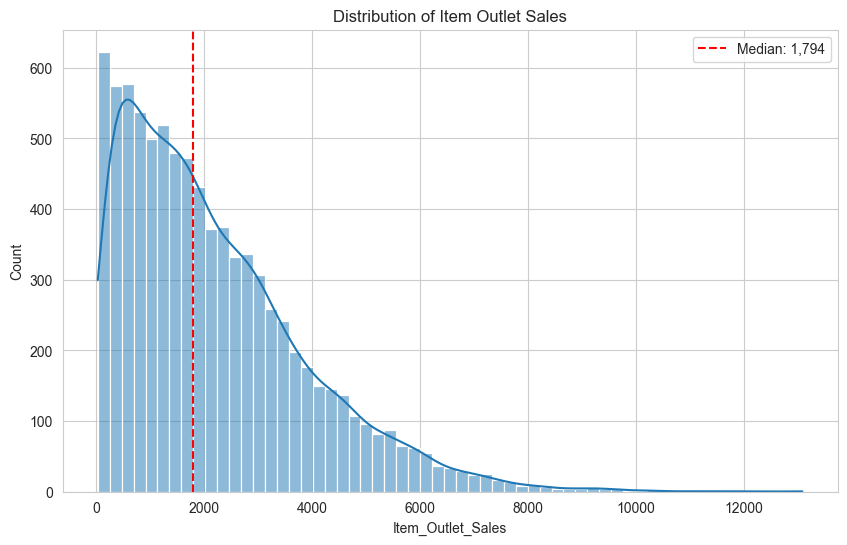

In [4]:
# Histogram of Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.histplot(data=sales_df, x="Item_Outlet_Sales", kde=True)
plt.title("Distribution of Item Outlet Sales")
plt.axvline(sales_df["Item_Outlet_Sales"].median(), color="red", linestyle="--", 
            label=f"Median: {sales_df['Item_Outlet_Sales'].median():,.0f}")
plt.legend()
plt.show()

### Outlet Analysis

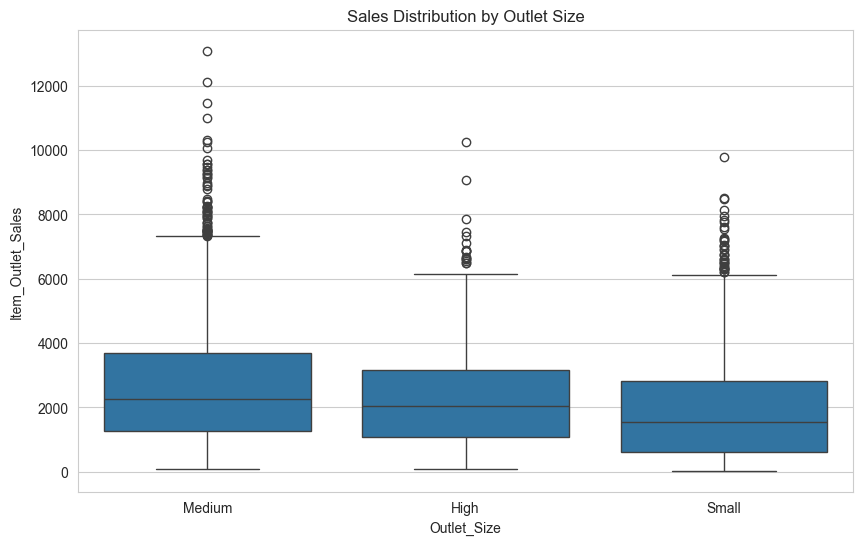

In [5]:
# Boxplot of sales by outlet size
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_df, x="Outlet_Size", y="Item_Outlet_Sales")
plt.title("Sales Distribution by Outlet Size")
plt.show()

### Item Analysis

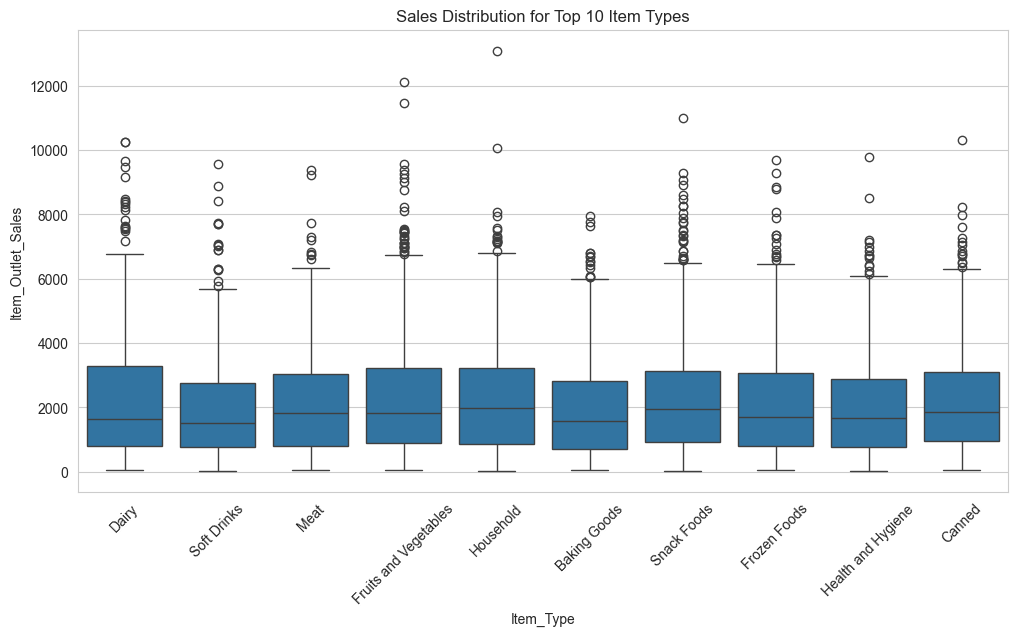

In [6]:
# Top 10 item types by sales
plt.figure(figsize=(12, 6))
top_items = sales_df["Item_Type"].value_counts().head(10).index
sns.boxplot(
    data=sales_df[sales_df["Item_Type"].isin(top_items)],
    x="Item_Type",
    y="Item_Outlet_Sales"
)
plt.xticks(rotation=45)
plt.title("Sales Distribution for Top 10 Item Types")
plt.show()

## Advanced Analysis

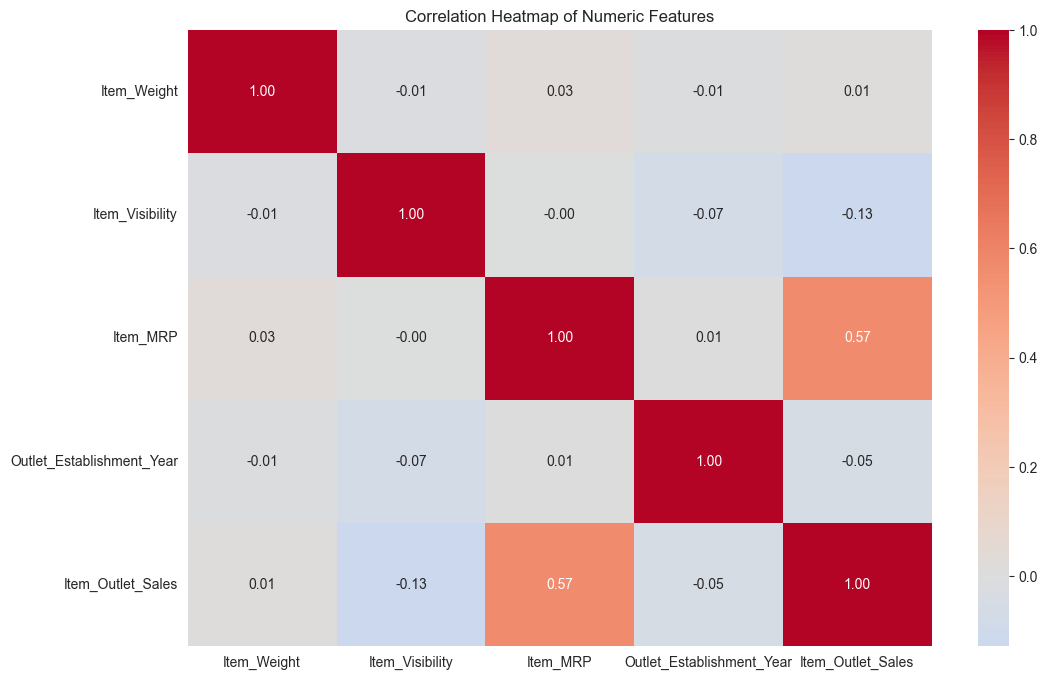

In [7]:
# Correlation heatmap
numeric_cols = sales_df.select_dtypes(include=["number"]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(
    sales_df[numeric_cols].corr(),
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Key Insights

1. **Sales Distribution**: Most items have sales below ₹2,500 with a long tail of higher sales
2. **Outlet Impact**: Larger outlets tend to have higher median sales
3. **Item Types**: Certain categories like "Fruits and Vegetables" show wider sales variation
4. **Correlations**: Item MRP shows the strongest positive correlation with sales (0.57)

In [8]:
# Save cleaned data for further analysis
sales_df.to_csv("bigmart_sales_cleaned.csv", index=False)